# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Capítulo 3</font>

## Exercícios 

Nesta lista de exercícios você vai continuar o trabalho que fizemos no Estudo de Caso neste capítulo. O código para carregar o dataset já está disponível para você. Leia cada exercício atentamente e coloque em prática suas habilidades analíticas. Todas as questões podem ser resolvidas com tudo já estudado até aqui no curso e consulte a documentação Python se necessário!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/dataframe_saved_v2.csv', parse_dates = ['Data'], usecols = list(range(0,6)))

In [3]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [4]:
df.sort_index(inplace = True)
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [229]:
# Exercício 1 - Qual o valor máximo da coluna Minutos?
round(df.Minutos.max(),2)

260.72

In [26]:
# Exercício 2 - Qual o valor mínimo de distância acima de 2.0?
df.query("Distancia > 2.0").Distancia.min()

2.01

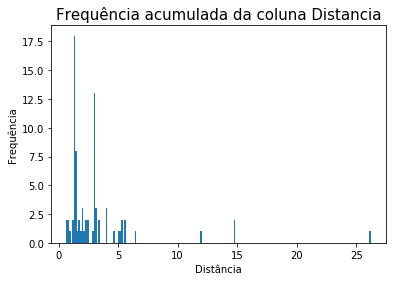

In [40]:
# Exercício 3 - Crie um plot com a frequência acumulada da coluna Distancia.
plt.title('Frequência acumulada da coluna Distancia', fontsize = 15)
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.hist(df.Distancia, bins = 200);

In [226]:
# Exercício 4 - Qual o dia da semana no índice de posição zero?
dict_dia_da_semana = {0:'Seg', 1:'Ter', 2:'Qua', 3:'Qui', 4:'Sex', 5:'Sab', 6:'Dom'}

dia = df.iloc[0].Data.dayofweek; dict_dia_da_semana[dia]

'Dom'

In [225]:
# Exercício 5 - Qual o dia da semana nos índices nas 5 primeiras posições?
s_days = df.iloc[0:5].Data
s_days.map(lambda x: x.dayofweek).map(dict_dia_da_semana)

0    Dom
1    Seg
2    Ter
3    Qui
4    Sex
Name: Data, dtype: object

In [224]:
# Exercício 6 - Extraia todos os dias da semana (em formato texto) e insira em uma nova coluna no dataframe df.
dias_da_semana = list(df['Data'].map(lambda x: x.dayofweek).values)
dias_da_semana_tex = list(map(lambda x: str(x),dias_da_semana))
df['Dia_da_Semana'] = dias_da_semana_tex; df

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km,Dia_da_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,NaN,6
1,2015-08-03,1.40,NaN,NaN,NaN,NaN,0
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,1
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,3
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437,3
77,2015-12-25,14.80,2:20:00,8400.0,140.000000,9.459459,4
78,2015-12-26,5.20,NaN,NaN,NaN,NaN,5
79,2015-12-30,3.15,0:22:10,1330.0,22.166667,7.037037,2


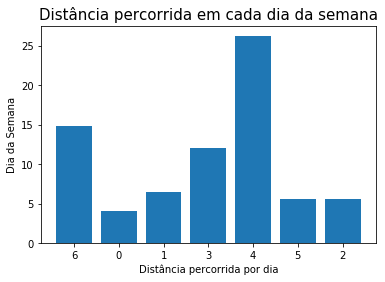

In [129]:
# Exercício 7 - Crie um gráfico de barras com o total da distância percorrida em cada dia da semana.
plt.title('Distância percorrida em cada dia da semana', fontsize = 15)
plt.xlabel('Distância percorrida por dia')
plt.ylabel('Dia da Semana')
plt.bar(x='Dia_da_Semana', height='Distancia', data=df);

In [132]:
# Exercício 8 - Delete a coluna Tempo do dataframe df.
df.drop('Tempo',axis=1)

,Data,Distancia,Segundos,Minutos,Min_Por_Km,Dia_da_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,6
1,2015-08-03,1.40,NaN,NaN,NaN,0
2,2015-08-04,2.10,NaN,NaN,NaN,1
3,2015-08-06,2.38,NaN,NaN,NaN,3
4,2015-08-07,2.30,NaN,NaN,NaN,4
...,...,...,...,...,...,...
76,2015-12-24,3.05,1508.0,25.133333,8.240437,3
77,2015-12-25,14.80,8400.0,140.000000,9.459459,4
78,2015-12-26,5.20,NaN,NaN,NaN,5
79,2015-12-30,3.15,1330.0,22.166667,7.037037,2


In [222]:
# Exercício 9 - Qual o total de corridas de taxi por dia da semana?
corridas_por_dia = pd.DataFrame(df.Dia_da_Semana.value_counts())
corridas_por_dia = corridas_por_dia.rename(columns = {'Dia_da_Semana' : 'Corridas'})
corridas_por_dia.index.name = 'DdS'; corridas_por_dia

,Corridas
DdS,
5,15
1,14
6,14
0,11
2,11
4,8
3,8


In [223]:
# Exercício 10 - Qual a média para cada uma das colunas por dia da semana?
df2 = df.set_index('Dia_da_Semana')
df2.groupby(level = 'Dia_da_Semana').mean().round(3)

,Distancia,Segundos,Minutos,Min_Por_Km
Dia_da_Semana,,,,
0,2.423,1185.750,19.763,7.464
1,2.607,1334.600,22.243,7.463
2,2.428,1306.250,21.771,7.660
3,3.315,1681.286,28.021,7.829
4,6.315,5071.800,84.530,8.040
5,2.786,1458.500,24.308,7.748
6,3.246,2802.500,46.708,8.185


## FIM

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>